In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import pickle
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
file_path = "train_data.txt"

df = pd.read_csv(file_path, delimiter=':::', header=None)

df.columns = ["movie_ID", "name", "genre", "plot"]
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_6456\3051162739.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter=':::', header=None)


,movie_ID,name,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
all_genres = df['genre']

len(all_genres)

54214

In [4]:
df['genre_new'] = df['genre'].apply(lambda x: x.split(', '))

In [5]:
df

,movie_ID,name,genre,plot,genre_new
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,[ drama ]
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,[ thriller ]
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,[ adult ]
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,[ drama ]
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,[ drama ]
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,[ comedy ]
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,[ horror ]
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",[ documentary ]
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,[ comedy ]


In [6]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
all_genres_df

,Genre,Count
0,drama,13613
1,thriller,1591
2,adult,590
3,documentary,13096
4,comedy,7447
5,crime,505
6,reality-tv,884
7,horror,2204
8,sport,432
9,animation,498


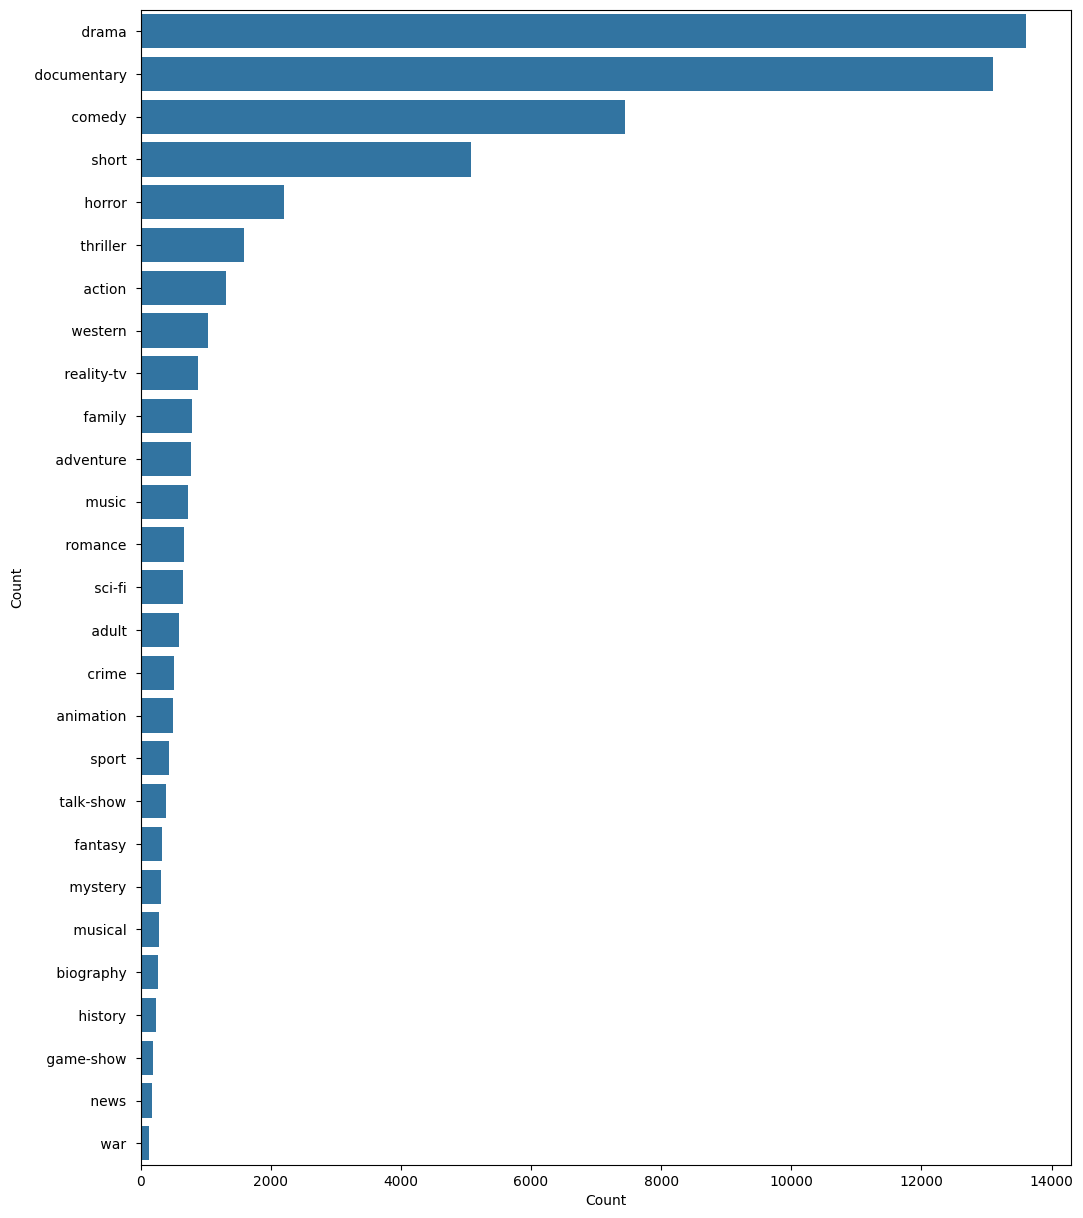

In [7]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [8]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text


In [9]:
df['clean_plot'] = df['plot'].apply(lambda x: clean_text(x))

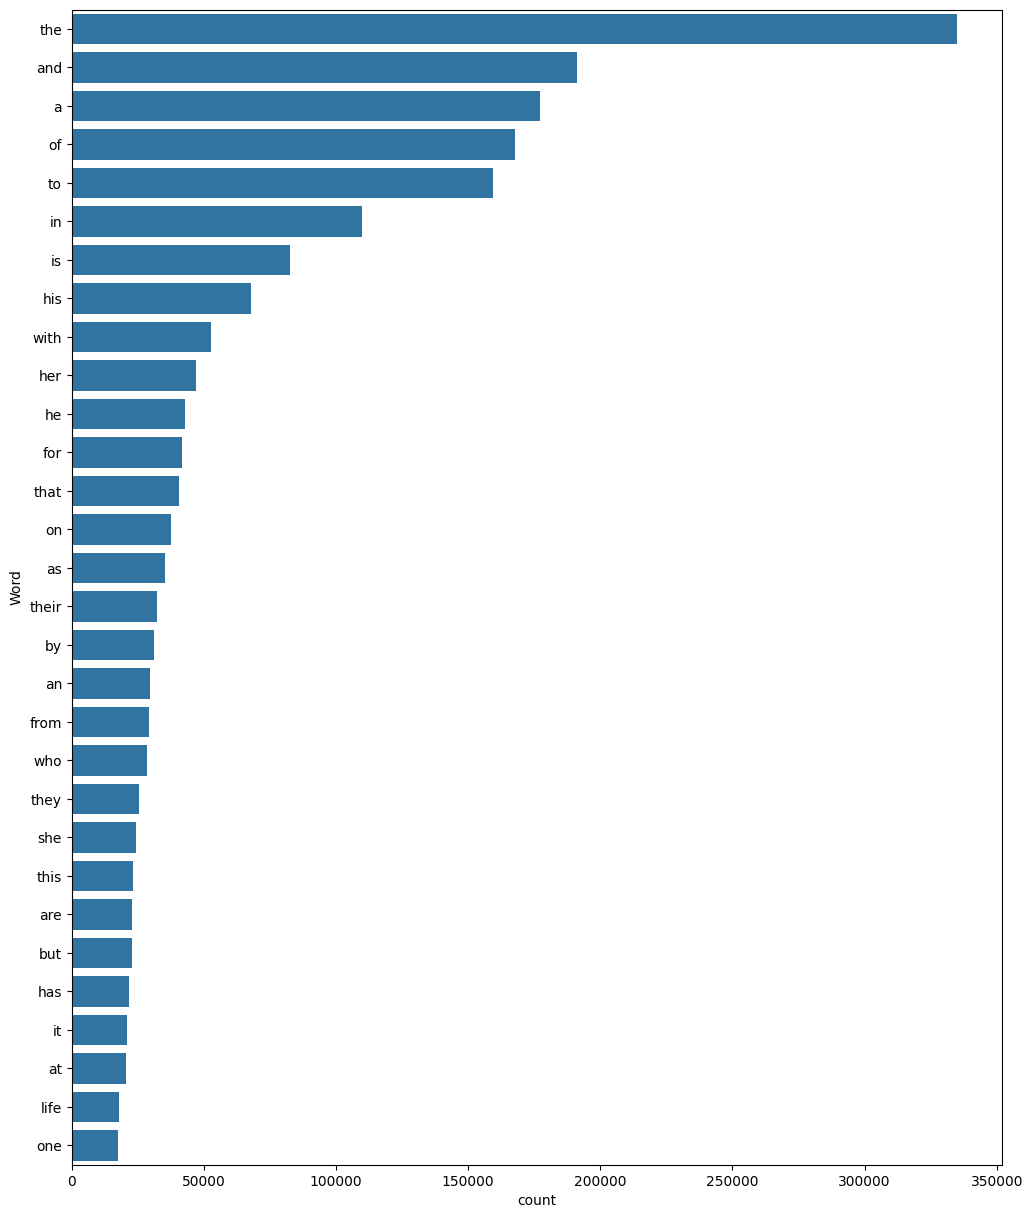

In [10]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words a
freq_words(df['clean_plot'])

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_plot'] = df['clean_plot'].apply(lambda x: remove_stopwords(x))

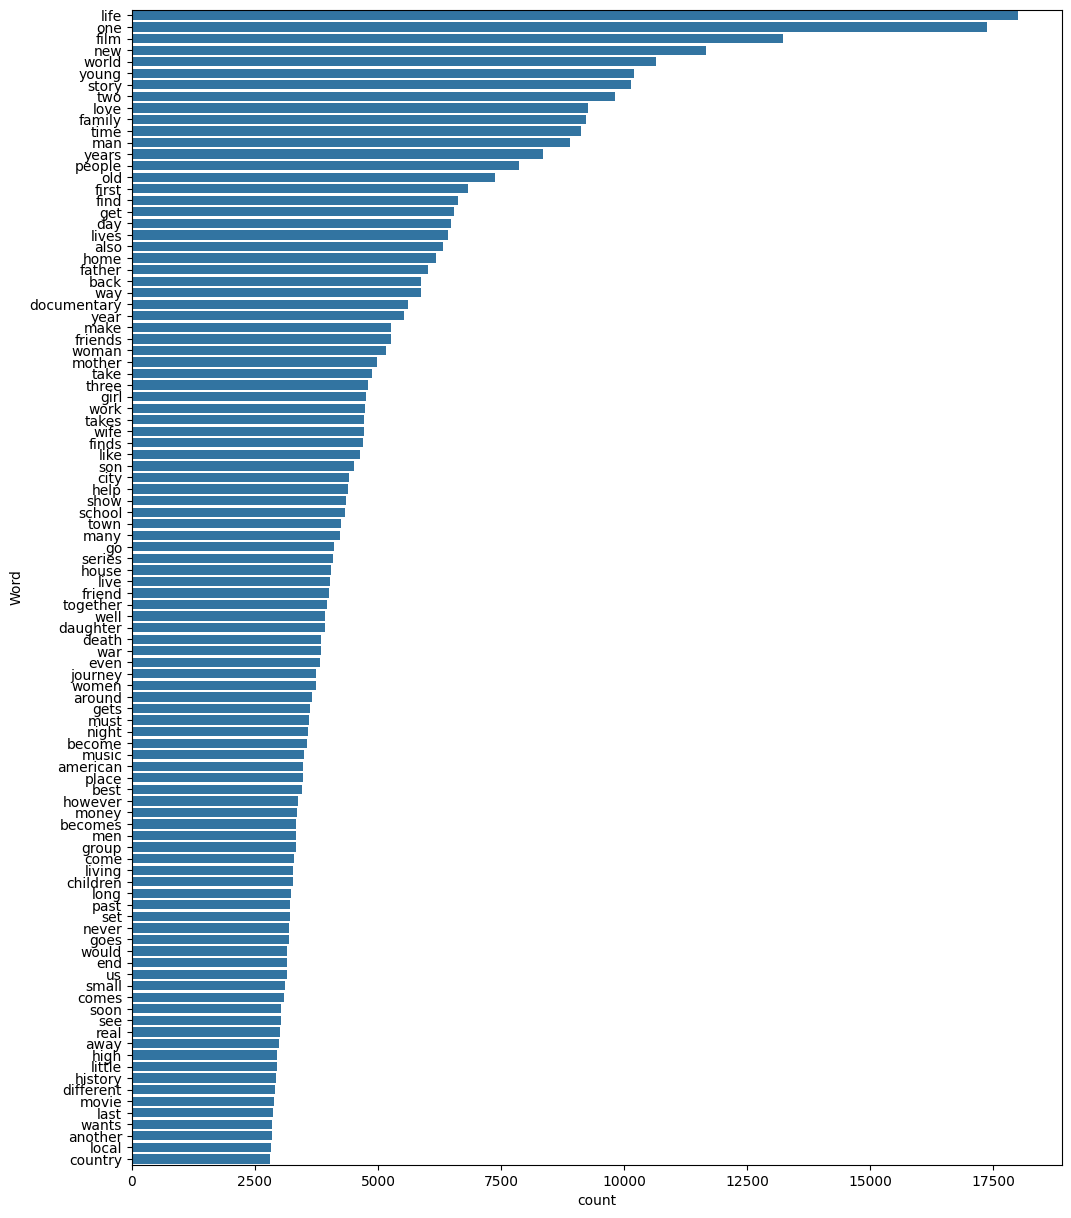

In [12]:
freq_words(df['clean_plot'], 100)

In [13]:
df

,movie_ID,name,genre,plot,genre_new,clean_plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,[ drama ],listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,[ thriller ],brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,[ adult ],bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,[ drama ],help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,[ drama ],films title refers un recovered bodies ground ...
...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,[ comedy ],short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,[ horror ],next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",[ documentary ],ze bestaan echt stand comedy growing facing fe...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,[ comedy ],walter vivian live country difficult time keep...


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(df['genre_new'])

In [15]:
xtrain, xval, ytrain, yval = train_test_split(df['clean_plot'], y, test_size=0.2, random_state=9)

In [16]:
tfidf_vectorizer = TfidfVectorizer()
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [17]:
print(f'xtrain_tfidf shape: {xtrain_tfidf.shape}')
print(f'xval_tfidf shape: {xval_tfidf.shape}')

xtrain_tfidf shape: (43371, 110904)
xval_tfidf shape: (10843, 110904)


In [18]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [19]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [20]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

clf.fit(xtrain_tfidf, ytrain)

y_pred = clf.predict(xval_tfidf)

y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [21]:
multilabel_binarizer.inverse_transform(y_pred)[3]

()

In [22]:
f1_score(yval, y_pred, average="micro")

0.46259029927760575

In [23]:
y_pred_prob = clf.predict_proba(xval_tfidf)

In [24]:
t = 0.3
y_pred_new = (y_pred_prob >= t).astype(int)

In [25]:
f1_score(yval, y_pred_new, average="micro")

0.5724036061732797

In [26]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [27]:
df

,movie_ID,name,genre,plot,genre_new,clean_plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,[ drama ],listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,[ thriller ],brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,[ adult ],bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,[ drama ],help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,[ drama ],films title refers un recovered bodies ground ...
...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,[ comedy ],short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,[ horror ],next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",[ documentary ],ze bestaan echt stand comedy growing facing fe...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,[ comedy ],walter vivian live country difficult time keep...


In [45]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", df['name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['genre_new'][k], "\n")


Movie:   Panic at the Disco: The Theatre of Imagination (2008)  
Predicted genre:  [(' documentary ',)]
Actual genre:  [' documentary '] 

Movie:   Speechless (2006/I)  
Predicted genre:  [()]
Actual genre:  [' drama '] 

Movie:   Akasa Kusum (2008)  
Predicted genre:  [()]
Actual genre:  [' drama '] 

Movie:   Tutti i rumori del mare (2012)  
Predicted genre:  [(' drama ',)]
Actual genre:  [' thriller '] 

Movie:   "Príncipes de Barrio" (2015)  
Predicted genre:  [()]
Actual genre:  [' drama '] 



In [29]:
test_path = 'test_data.txt'
dd = pd.read_csv(test_path, delimiter=':::', header=None)

dd.columns = ["movie_ID", "name", "plot"]
dd

C:\Users\Dell\AppData\Local\Temp\ipykernel_6456\3784293860.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dd = pd.read_csv(test_path, delimiter=':::', header=None)


,movie_ID,name,plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [30]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [31]:
dd['clean_plot'] = dd['plot'].apply(lambda x: clean_text(x))

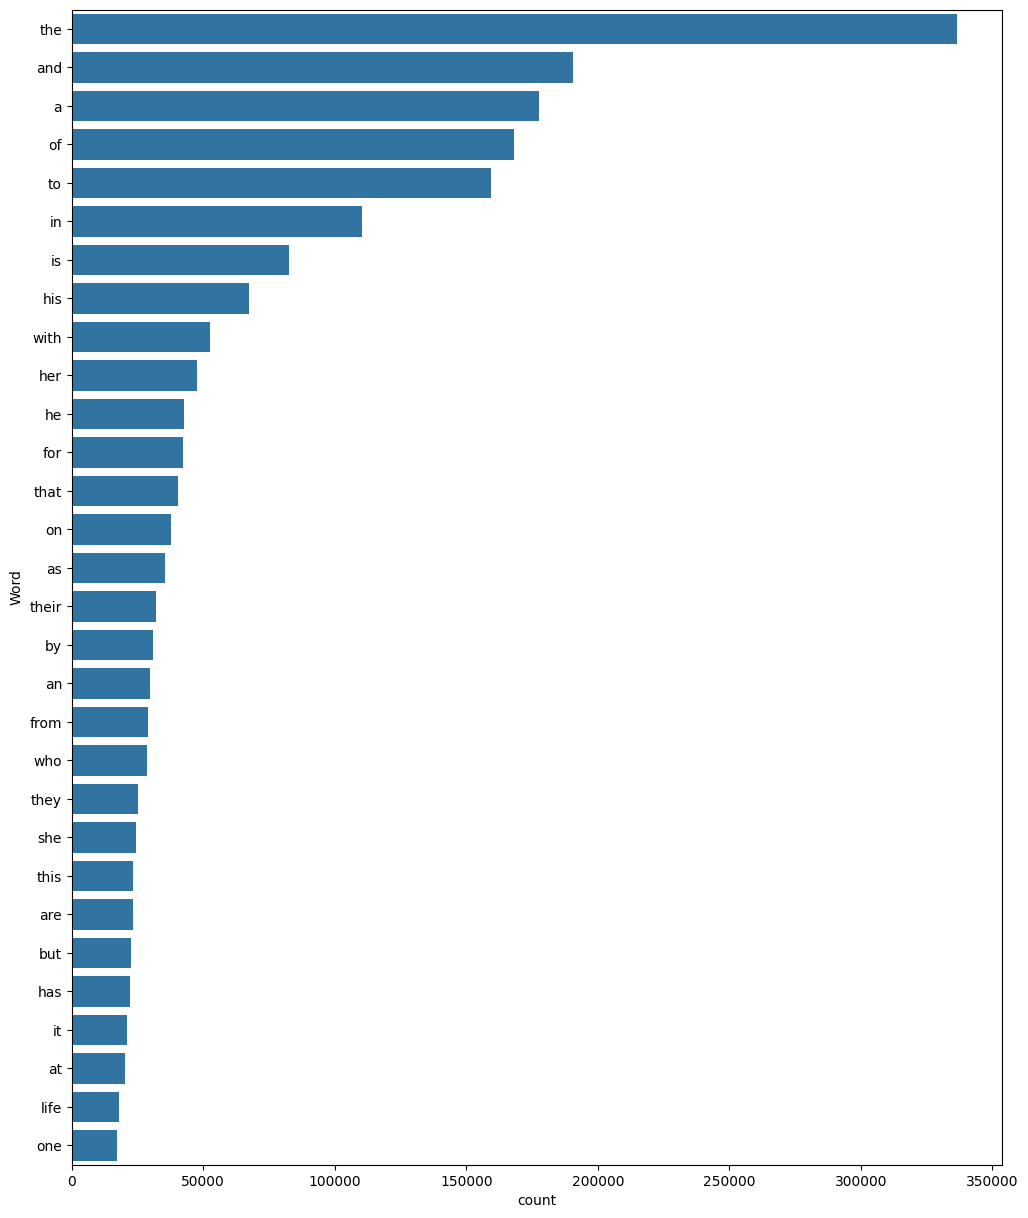

In [32]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words a
freq_words(dd['clean_plot'])

In [33]:
dd

,movie_ID,name,plot,clean_plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves his life his car his apartment...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico is a very naughty child of t...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year in the life of albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",his father has died he hasnt spoken with his b...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,before he was known internationally as a marti...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales of light dark i...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,as alice and cora munro attempt to find their ...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,a movie years in the making oliver twist the a...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular but mysterious rock d j mike mallard a...


In [34]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

dd['clean_plot'] = dd['clean_plot'].apply(lambda x: remove_stopwords(x))

In [35]:
dd

,movie_ID,name,plot,clean_plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves life car apartment job especia...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock j mike mallard askew b...


In [36]:
xtest_tfidf = tfidf_vectorizer.transform(dd['clean_plot'])


In [37]:
y_test_pred = clf.predict(xtest_tfidf)


In [38]:
if len(y_test_pred.shape) > 1 and y_test_pred.shape[1] > 1:
    y_test_pred = y_test_pred.argmax(axis=1)


In [39]:
genre_mapping = {
    0: 'Action',
    1: 'Comedy',
    2: 'Drama',
    3: 'Fantasy',
    4: 'Horror',
    5: 'Romance',
    6: 'Sci-Fi',
    7: 'Thriller'
    # Add more mappings as needed
}

In [42]:
y_test_pred_labels = pd.Series(y_test_pred).map(genre_mapping)

# Add predictions to the test DataFrame
dd['predicted_genre'] = y_test_pred_labels

# Print the predictions
# print(test_df[['clean_plot', 'predicted_genre']])

In [43]:
dd[['clean_plot', 'predicted_genre']]

,clean_plot,predicted_genre
0,l r brane loves life car apartment job especia...,Action
1,spain march quico naughty child three belongin...,NaN
2,one year life albin family shepherds north tra...,Thriller
3,father died hasnt spoken brother years serious...,NaN
4,known internationally martial arts superstar b...,NaN
...,...,...
54195,covering multiple genres tales light dark anth...,Action
54196,alice cora munro attempt find father british o...,Action
54197,movie years making oliver twist artful dodger ...,Action
54198,popular mysterious rock j mike mallard askew b...,Action
